# Data visualisation du jeu de donnée Heart

## 1 Construction de graphiques avec matplotlib
### 1.1 Représentation individuel des variables

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Si vous travaillez dans un notebook Jupyter, il vous faudra ajouter une ligne au début de votre notebook afin de faire en sorte que le graphique apparaisse dans le notebook à la suite de votre code sous la forme d’une image statique :

In [2]:
%matplotlib inline

In [5]:
data = pd.read_table("heart.txt")
df = data.copy()

In [170]:
df.head(10)

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100,234,A,A,156,non,1,1,B,presence
1,41,feminin,130,204,A,C,172,non,14,1,A,absence
2,58,masculin,150,270,A,C,111,oui,8,1,A,presence
3,53,masculin,140,203,B,C,155,oui,31,3,A,presence
4,41,masculin,130,214,A,C,168,non,20,2,A,absence
5,65,feminin,155,269,A,A,148,non,8,1,A,absence
6,51,masculin,110,175,A,A,123,non,6,1,A,absence
7,45,feminin,112,160,A,A,138,non,0,2,A,absence
8,55,masculin,130,262,A,A,155,non,0,1,A,absence
9,58,feminin,136,319,B,C,152,non,0,1,C,presence


In [9]:
data.shape

(270, 12)

In [10]:
df.dtypes

age            int64
sexe          object
pression       int64
cholester      int64
sucre         object
electro       object
taux_max       int64
angine        object
depression     int64
pic            int64
vaisseau      object
coeur         object
dtype: object

In [12]:
df.columns

Index(['age', 'sexe', 'pression', 'cholester', 'sucre', 'electro', 'taux_max',
       'angine', 'depression', 'pic', 'vaisseau', 'coeur'],
      dtype='object')

### 1.1.1 Représentation individuel des variables des variables qualitatives
- D'abord je représente la variable cible.
- Ensuite je représente toutes les autres variables qualitatives dans un même cadre.

Je commence par tracer un diagramme en batôn représentant la repartition en nombres d'individus pour modalité.
Puis je trace un cercle circulaire donnant la repartion en pourcentage des différentes modalités

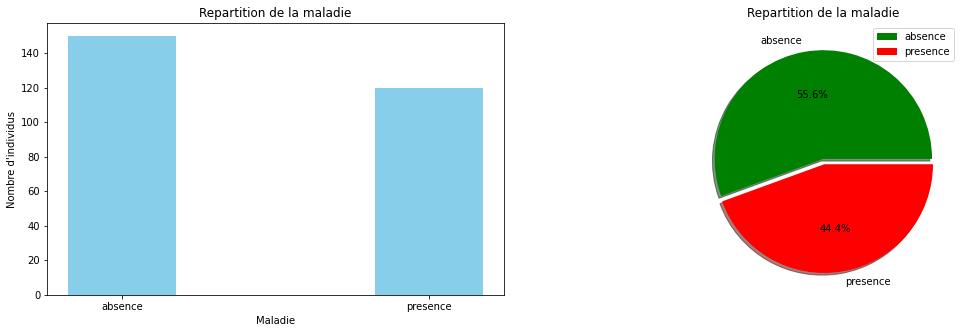

In [1131]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
name = ['absence', 'presence']
width = 0.35

plt.bar(name, df['coeur'].value_counts(), width,
                color='SkyBlue', label='Resa instant')
plt.ylabel("Nombre d'individus")
plt.xlabel("Maladie")
plt.title("Repartition de la maladie")

plt.subplot(1, 2, 2)
plt.pie(df['coeur'].value_counts(),
           labels=['absence', 'presence'],
           colors = ['green', 'red'],
           explode = [0, 0.05],
           autopct = '%1.1f%%',
           shadow = True)
plt.title("Repartition de la maladie")
plt.legend()
plt.show()

In [543]:
def graphBar(variable, couleur, titre):
    ax = df[variable].value_counts().plot(kind='bar', figsize=(18,5),
                                            color=couleur, fontsize=13,);
    ax.set_alpha(0.8)
    ax.set_title(titre, fontsize=18)
    ax.set_ylabel("Nombre d'individus", fontsize=18);
    
    
    # créer une liste pour collecter les données plt.patches
    totals = []

    # trouver les valeurs et ajouter à la liste
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # définir des étiquettes de barres individuelles à l'aide de la liste ci-dessus
    for i in ax.patches:
        # get_x tire vers la gauche ou vers la droite ; get_height pousse vers le haut ou vers le bas
        ax.text(i.get_x(), i.get_height()+.5, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                    color='dimgrey')

def pieBar(variable, couleur, titre):
    fig, ax = plt.subplots(1, 2)
    graphBar(variable, couleur, titre)
    ax[0].pie(df[variable].value_counts(),
    #                labels=['absence', 'presence'],
                   colors = couleur,
    #                explode = [0, 0.05],
               autopct = '%1.2f%%',
               shadow = True)
    ax[0].set_title(titre, fontsize=18)
    plt.show()
    print(120*'=')

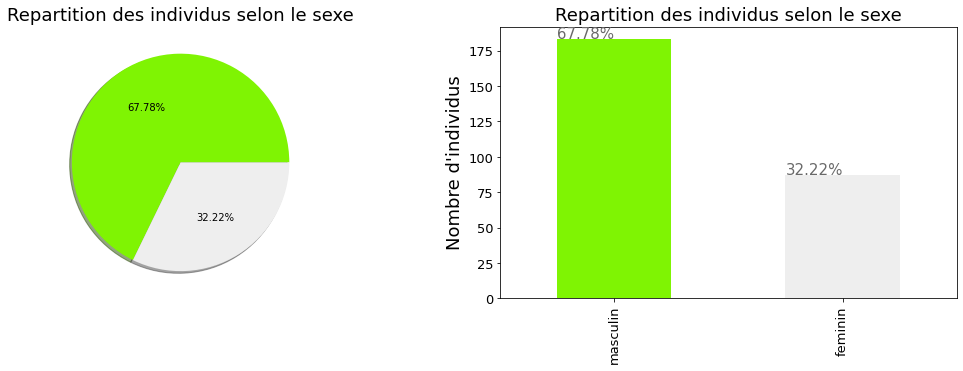

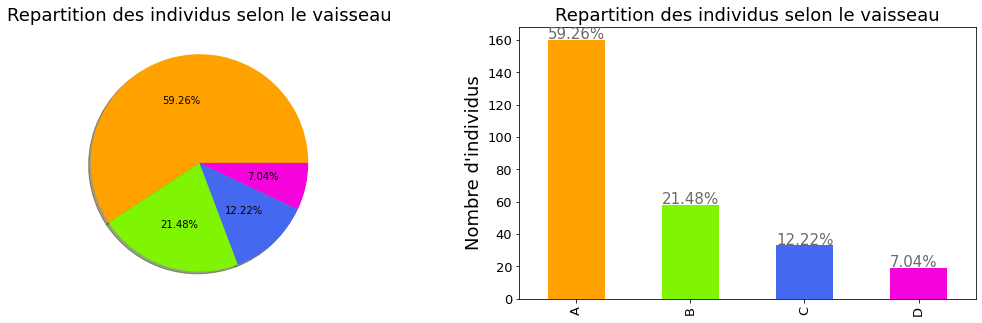

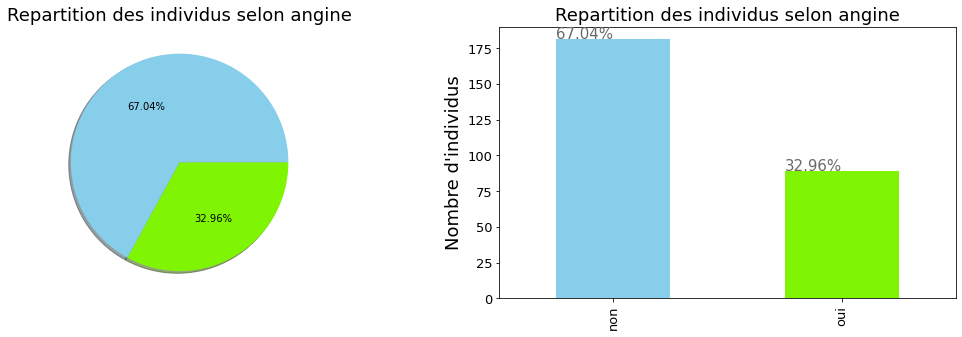

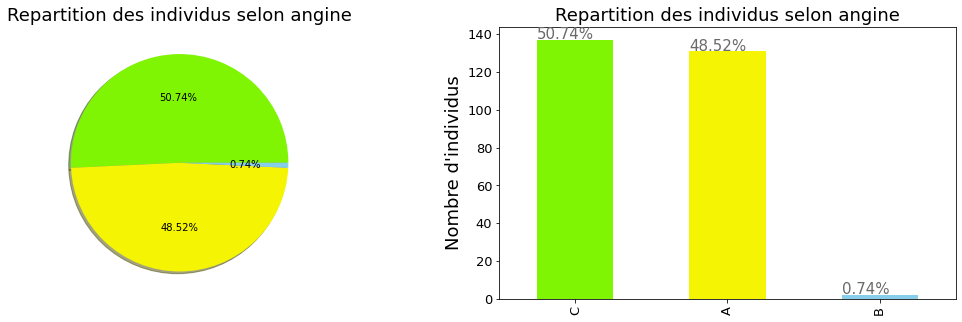

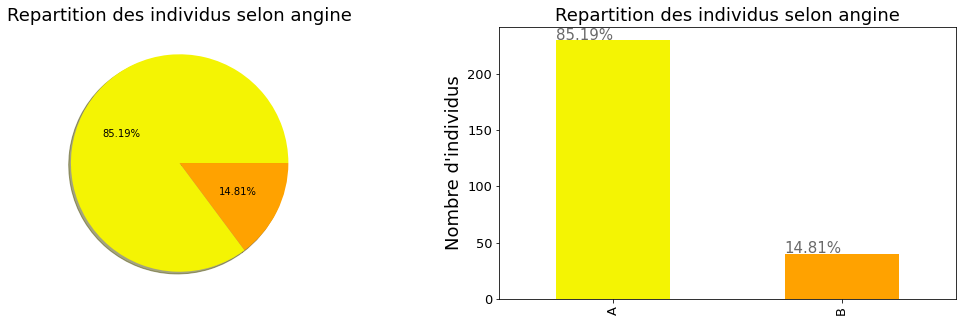

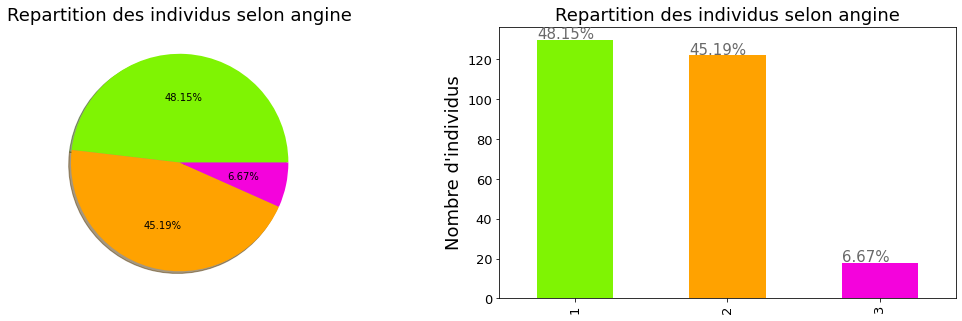

In [542]:
couleurs = ['SkyBlue', '#4568f1', '#f4f403', '#EEEEEE', '#7ff403', '#f403dc', '#ffa200']

pieBar(variable='sexe', couleur=sample(couleurs, k=2), titre='Repartition des individus selon le sexe')
pieBar(variable='vaisseau', couleur=sample(couleurs, k=4), titre='Repartition des individus selon le vaisseau')
pieBar(variable='angine', couleur=sample(couleurs, k=2), titre='Repartition des individus selon angine')
pieBar(variable='electro', couleur=sample(couleurs, k=3), titre='Repartition des individus selon angine')
pieBar(variable='sucre', couleur=sample(couleurs, k=2), titre='Repartition des individus selon angine')
pieBar(variable='pic', couleur=sample(couleurs, k=3), titre='Repartition des individus selon angine')

### 1.1.2 Représentation individuel des variables des variables qualitatives

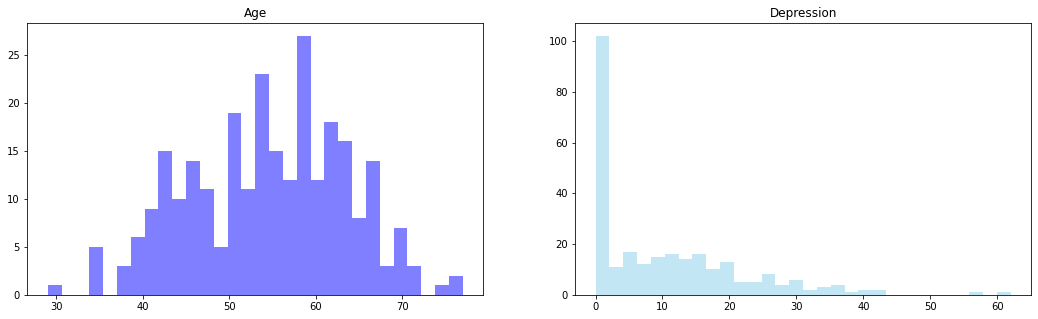

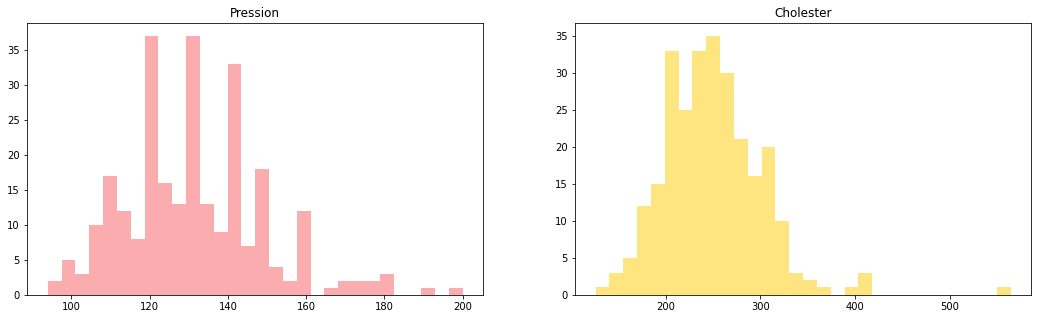

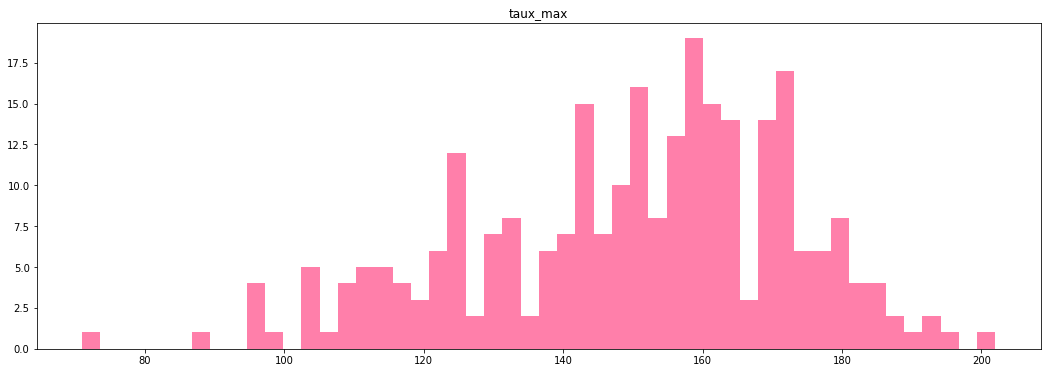

In [610]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=30, color="blue", alpha=0.5)
plt.title("Age")
plt.subplot(1, 2, 2)
plt.hist(df['depression'], bins=30, color="SkyBlue", alpha=0.5)
plt.title("Depression")
plt.show()

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.hist(df['pression'], bins=30, color="#F75B5E", alpha=0.5)
plt.title("Pression")
plt.subplot(1, 2, 2)
plt.hist(df['cholester'], bins=30, color="#ffcd03", label="Cholester", alpha=0.5)
plt.title("Cholester")
plt.show()

plt.figure(figsize=(18, 6))
plt.hist(df['taux_max'], bins=50, color="#ff0156", alpha=0.5)
plt.title("taux_max")
plt.show()

In [611]:
def graphBarQ(variable, couleur, titre, type_bar='bar'):
    ax = df[variable].value_counts().plot(kind=type_bar, figsize=(18,6), color=couleur, fontsize=13,);
    ax.set_alpha(0.8)
    ax.set_title(titre, fontsize=18)
    ax.set_ylabel("Nombre d'individus", fontsize=18);
    
    plt.show()

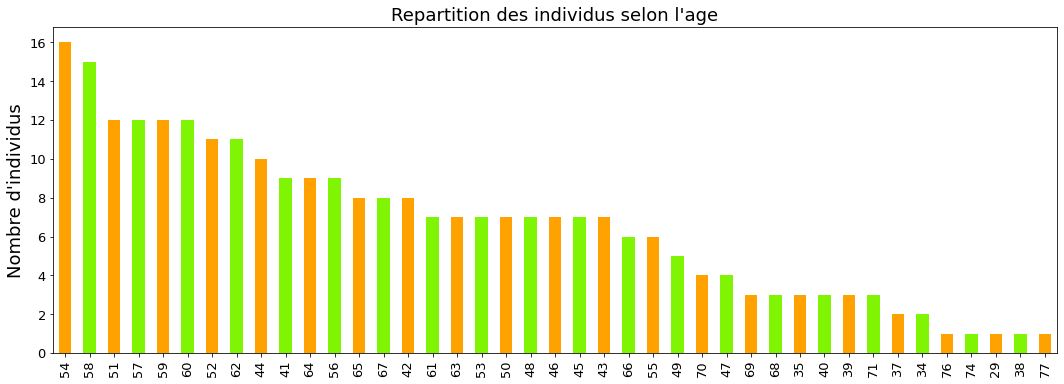

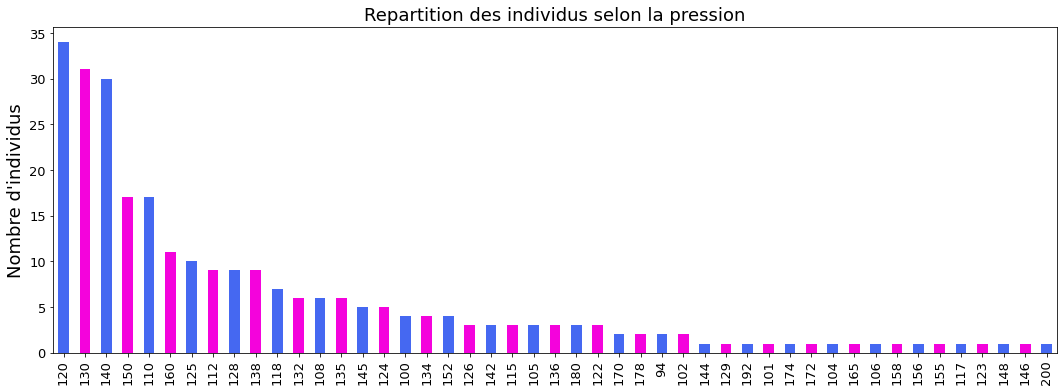

In [689]:
graphBarQ('age', couleur=sample(couleurs, k=2), titre="Repartition des individus selon l'age")
graphBarQ('pression', couleur=sample(couleurs, k=2), titre="Repartition des individus selon la pression")

In [799]:
total_absence = nF_Coeur_absence + nH_Coeur_absence
total_presence = nF_Coeur_presence + nH_Coeur_presence
print(total_absence)
print(total_presence)

150
120


### 1.1.3 Représentation de deux variables qualitatives

In [1068]:
def bar2varible(lis_of_label, dic_of_mod, titre):
    """
    Cette fonction permet de visualiser la distribution d'une variable en fonction d'une autre à l'aide d'un digramme en 
    barre.
    :param lis_of_label: Une liste contenant les noms à mettre en abscise
    :param dic_of_mod: Un dictionnaire donc les clés sont les labels des barres et les 
                       valeurs sont des liste contenant les effectives à représenter
    :param titre: le titre à afficher sur le graphique
    
     exemple:
         lis_of_label = ['Absence', 'Presence']
         dic_of_mod = {'Homme': [12, 57], 'Femme': [55, 102]}
    """
    
    couleurs = ['SkyBlue', '#4568f1', '#f4f403', '#EEEEEE', '#7ff403', '#f403dc', '#ffa200']
    
    labels = lis_of_label
    bar_labels = []
    bars = []
    value_bar_sum = []
    
    for key, value in dic_of_mod.items():
        bar_labels.append(key)
        bars.append(value)

    x = np.arange(len(labels))  # les coordonnées des abscisses x des bâtons
    width = 0.35  # largeur des bâtons 

    fig, ax = plt.subplots(figsize=(16,7))
    
    # Je trace les graphes avec un legé decalage
    for bar, bar_label in zip(bars, bar_labels):
        if index%2==0:
            ax.bar(x - width/2, bar, width, label=bar_label, color=sample(couleurs, k=1))
        else:
            ax.bar(x + width/2, bar, width, label=bar_label, color=sample(couleurs, k=1))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Nombre d'individus", fontsize=18)
    ax.set_title(titre, fontsize=18, fontweight='500', color='#000', pad=15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # # ax.bar_label(rects1, padding=3)
    # # ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    plt.show()

In [1070]:
labels = ['Absence', 'Presence']
mod_homme = [nH_Coeur_absence, nH_Coeur_presence]
mod_femme = [nF_Coeur_absence, nF_Coeur_presence]

variable_mod = {'Homme': mod_homme, 'Femme': mod_femme}
variable_mod

{'Homme': [83, 100], 'Femme': [67, 20]}

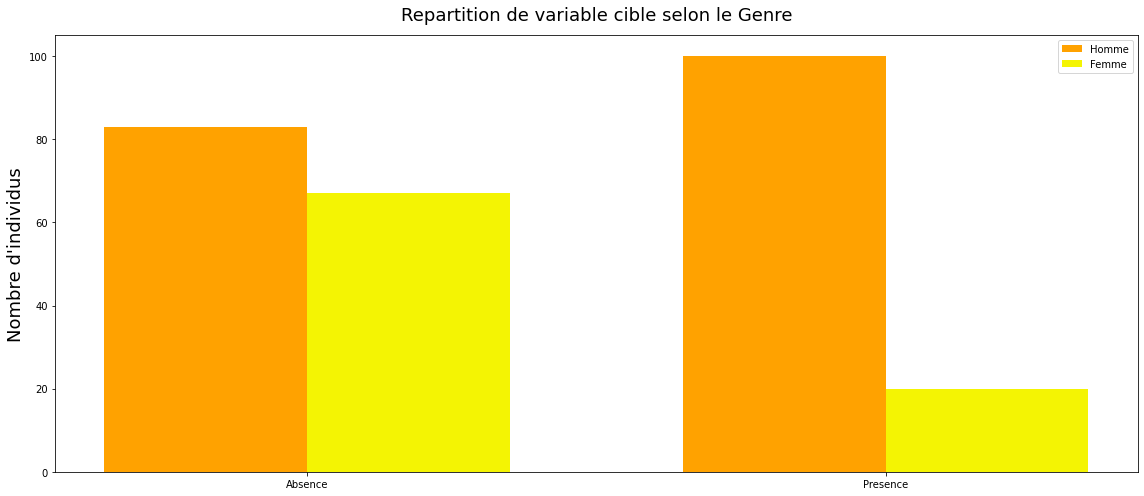

In [1071]:
bar2varible(lis_of_label=labels, dic_of_mod=variable_mod, titre='Repartition de variable cible selon le Genre')

In [1072]:
def var_stat_group(var_1, list_mod_in_var_1, var_2, list_mod_in_var_2):
    """
    exemple param:  'coeur', ['absence', 'presence'], 'vaisseau', ['A', 'B', 'C', 'D']
    
            sortir   {'absence_vaisseau_A': 120,
                     'absence_vaisseau_B': 20,
                     'absence_vaisseau_C': 7,
                     'absence_vaisseau_D': 3,
                     'presence_vaisseau_A': 40,
                     'presence_vaisseau_B': 38,
                     'presence_vaisseau_C': 26,
                     'presence_vaisseau_D': 16}
    :return dic:     
    """
    dic = {}
    for i in list_mod_in_var_1:
        for j in list_mod_in_var_2:
            dic[f'{i}_{var_2}_{j}'] = ((df[var_1]==i)&(df[var_2]==j)).sum()
            dic[f'{i}_{var_2}_{j}'] = ((df[var_1]==i)&(df[var_2]==j)).sum()
        
    return dic

In [1073]:
dic = var_stat_group('vaisseau', ['A', 'B', 'C', 'D'], 'coeur', ['absence', 'presence'])
dic

{'A_coeur_absence': 120,
 'A_coeur_presence': 40,
 'B_coeur_absence': 20,
 'B_coeur_presence': 38,
 'C_coeur_absence': 7,
 'C_coeur_presence': 26,
 'D_coeur_absence': 3,
 'D_coeur_presence': 16}

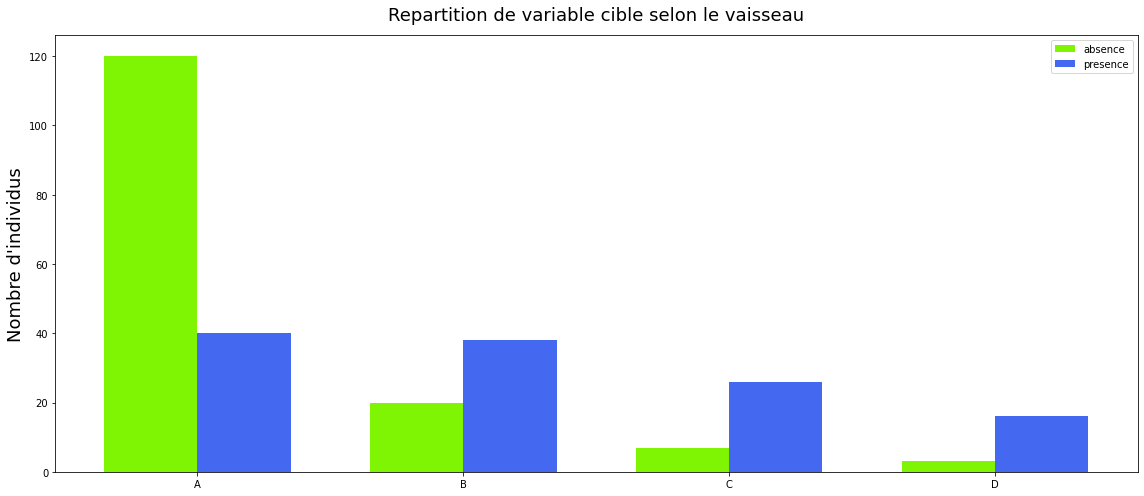

In [1074]:
labels = ['A', 'B', 'C', 'D']
absence = [dic['A_coeur_absence'], dic['B_coeur_absence'], dic['C_coeur_absence'], dic['D_coeur_absence']]
presence = [dic['A_coeur_presence'], dic['B_coeur_presence'], dic['C_coeur_presence'], dic['D_coeur_presence']]
title = 'Repartition de variable cible selon le vaisseau'

variable_mod = {'absence': absence, 'presence': presence}
bar2varible(lis_of_label=labels, dic_of_mod=variable_mod, titre=title)

In [1075]:
dic = var_stat_group('sucre', ['A', 'B'], 'coeur', ['absence', 'presence'])
dic

{'A_coeur_absence': 127,
 'A_coeur_presence': 103,
 'B_coeur_absence': 23,
 'B_coeur_presence': 17}

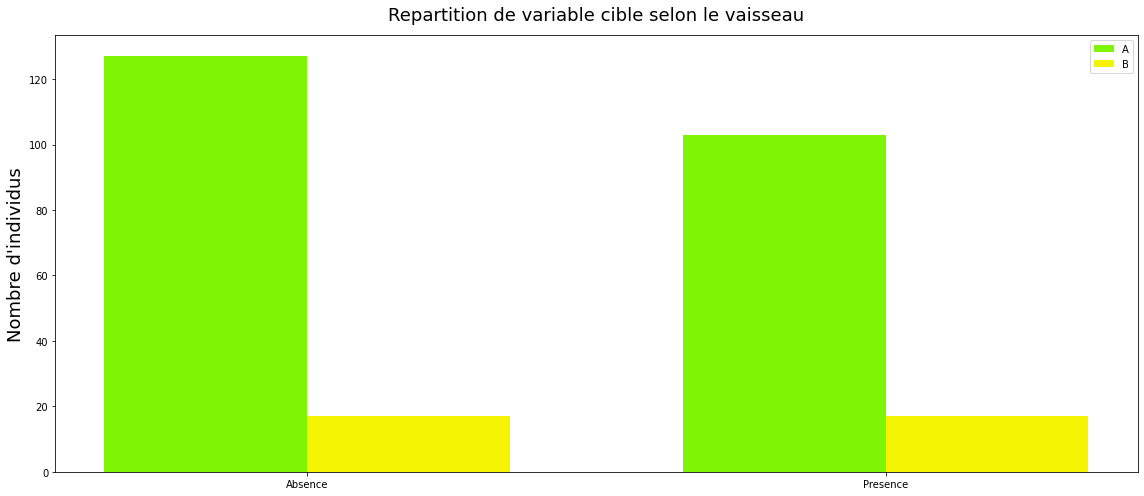

In [1076]:
labels = ['Absence', 'Presence']
A = [dic['A_coeur_absence'], dic['A_coeur_presence']]
B = [dic['B_coeur_presence'], dic['B_coeur_presence']]
title = 'Repartition de variable cible selon le vaisseau'

variable_mod = {'A': A, 'B': B}
bar2varible(lis_of_label=labels, dic_of_mod=variable_mod, titre=title)

In [1077]:
dic = var_stat_group('electro', ['A', 'B', 'C'], 'coeur', ['absence', 'presence'])
dic

{'A_coeur_absence': 85,
 'A_coeur_presence': 46,
 'B_coeur_absence': 1,
 'B_coeur_presence': 1,
 'C_coeur_absence': 64,
 'C_coeur_presence': 73}

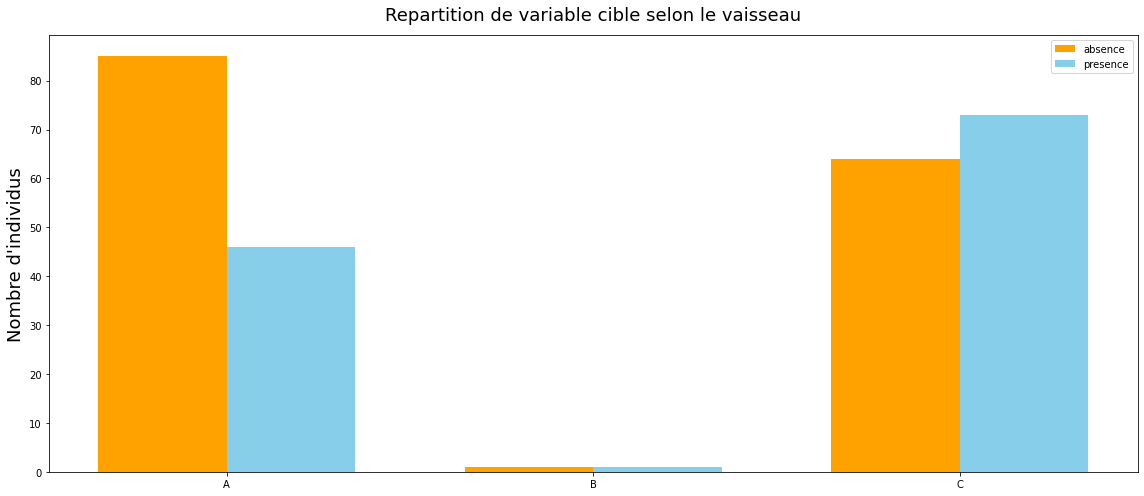

In [1079]:
labels = ['A', 'B', 'C']
absence = [dic['A_coeur_absence'], dic['B_coeur_absence'], dic['C_coeur_absence']]
presence = [dic['A_coeur_presence'], dic['B_coeur_presence'], dic['C_coeur_presence']]
title = 'Repartition de variable cible selon le vaisseau'

variable_mod = {'absence': absence, 'presence': presence}
bar2varible(lis_of_label=labels, dic_of_mod=variable_mod, titre=title)

In [1080]:
dic = var_stat_group('angine', ['oui', 'non'], 'coeur', ['absence', 'presence'])
dic

{'oui_coeur_absence': 23,
 'oui_coeur_presence': 66,
 'non_coeur_absence': 127,
 'non_coeur_presence': 54}

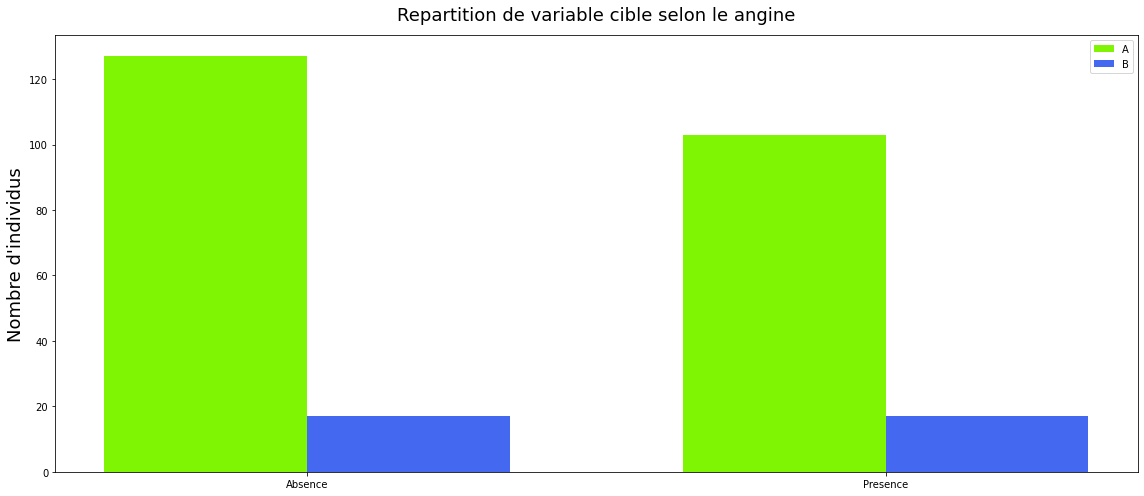

In [1086]:
labels = ['Absence', 'Presence']
Oui = [dic['oui_coeur_absence'], dic['oui_coeur_absence']]
Non = [dic['non_coeur_absence'], dic['non_coeur_presence']]
title = 'Repartition de variable cible selon le angine'

variable_mod = {'A': A, 'B': B}
bar2varible(lis_of_label=labels, dic_of_mod=variable_mod, titre=title)

In [1370]:
dic = var_stat_group('pic', [1, 2, 3], 'coeur', ['absence', 'presence'])
dic

{'1_coeur_absence': 98,
 '1_coeur_presence': 32,
 '2_coeur_absence': 44,
 '2_coeur_presence': 78,
 '3_coeur_absence': 8,
 '3_coeur_presence': 10}

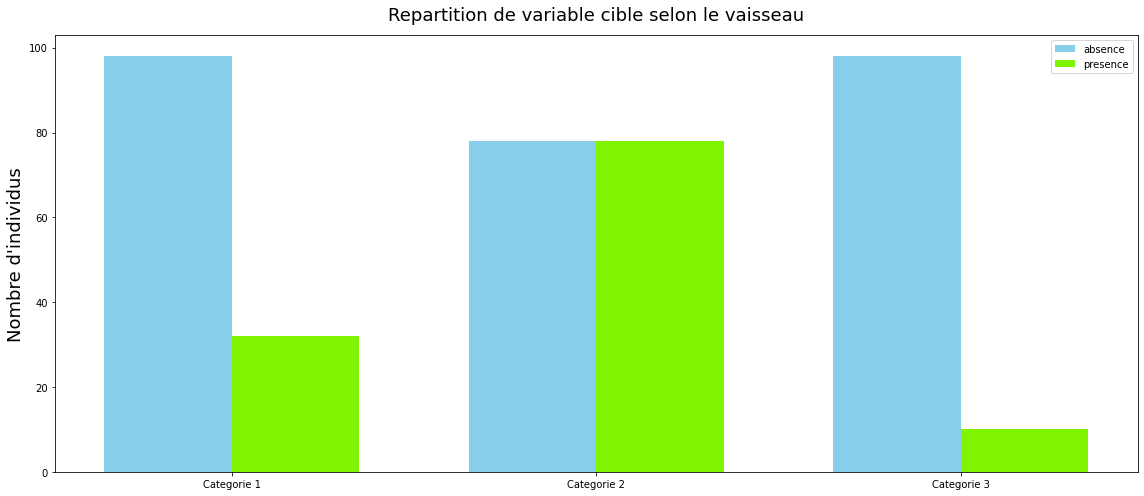

In [1089]:
labels = ['Categorie 1', 'Categorie 2', 'Categorie 3']
absence = [dic['1_coeur_absence'], dic['2_coeur_presence'], dic['1_coeur_absence']]
presence = [dic['1_coeur_presence'], dic['2_coeur_presence'], dic['3_coeur_presence']]
title = 'Repartition de variable cible selon le vaisseau'

variable_mod = {'absence': absence, 'presence': presence}
bar2varible(lis_of_label=labels, dic_of_mod=variable_mod, titre=title)

## 1.2 Construction de graphiques avec seaborn
### 1.2.1 Représentation individuel des variables quantitative

In [1206]:
import seaborn as sns
from scipy import stats

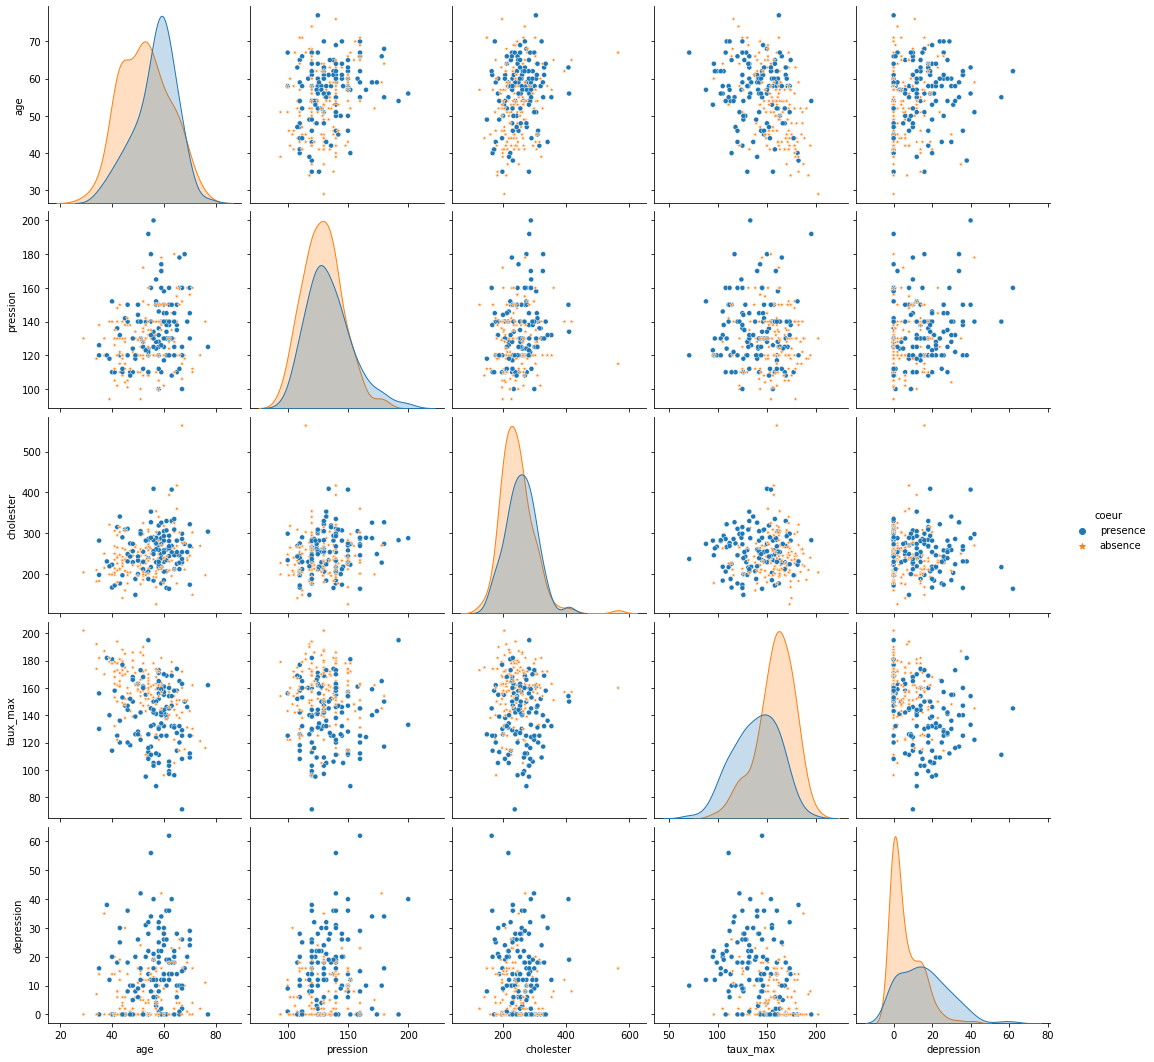

In [1017]:
sns.pairplot(data=df, hue='coeur',
vars=['age', 'pression','cholester', 'taux_max', 'depression'],
height=3, plot_kws={"s": 25},
markers=['o', '*'])

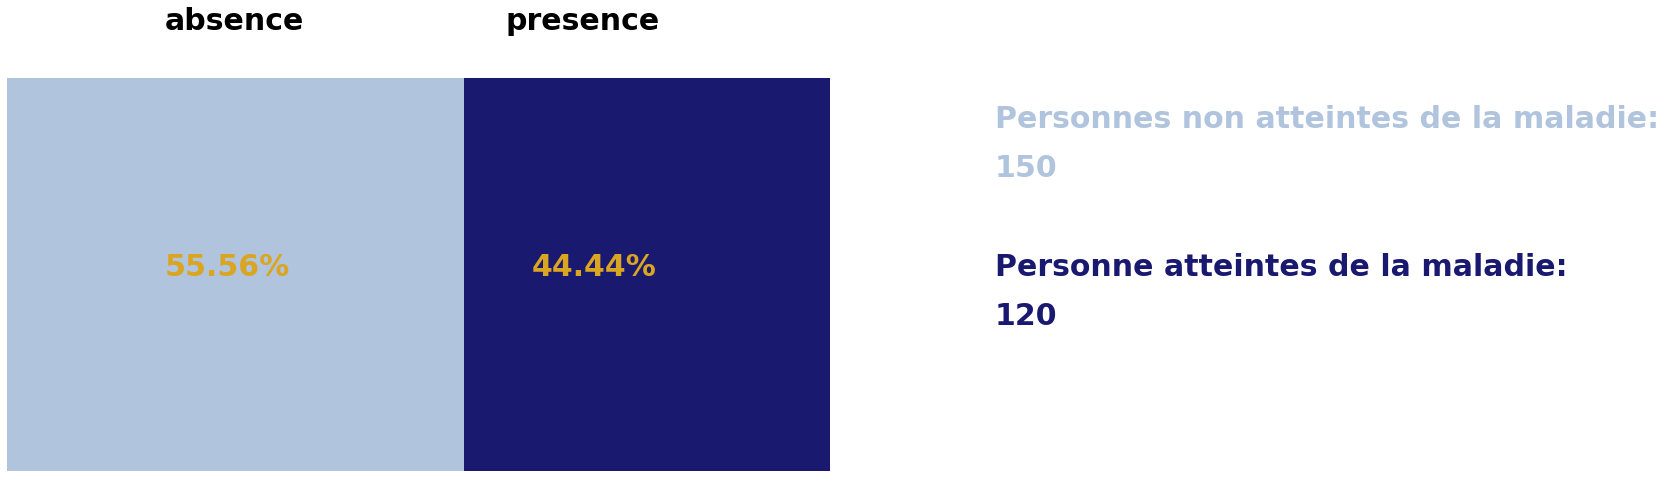

In [1310]:
# group by genre
group_genre = df.groupby('coeur')['sexe'].count().reset_index()
group_genre.rename(columns={'sexe':'Count'}, inplace=True)
group_genre['Percentage'] = round(group_genre['Count']/sum(group_genre['Count'])*100,2)

# fig
fig = plt.figure(figsize=(12,6))

# axes
axes1 = fig.add_axes([0,0,1,1])

# barh
axes1.barh(width=group_genre['Percentage'][0]+group_genre['Percentage'][1], y=0, color='MidnightBlue')
axes1.barh(width=group_genre['Percentage'][0], y=0, color='LightSteelBlue')

# percentages
axes1.text(group_genre['Percentage'][0]/2.9, 0, f"{group_genre['Percentage'][0]}%", color='Goldenrod', fontsize=30, fontweight='bold')
axes1.text((group_genre['Percentage'][0]+group_genre['Percentage'][1])/1.57, 0, f"{group_genre['Percentage'][1]}%", color='Goldenrod', fontsize=30, fontweight='bold')

# count
axes1.text(120, 0.3, 'Personnes non atteintes de la maladie:', fontsize=30, fontweight='bold', color='LightSteelBlue')
axes1.text(120, 0.2, f"{group_genre['Count'][0]}", fontsize=30, fontweight='bold', color='LightSteelBlue')
axes1.text(120, 0, 'Personne atteintes de la maladie:', fontsize=30, fontweight='bold', color='MidnightBlue')
axes1.text(120, -0.1, f"{group_genre['Count'][1]}", fontsize=30, fontweight='bold', color='MidnightBlue')

# title
axes1.text(group_genre['Percentage'][0]/2.9, 0.5, f"{group_genre['coeur'][0]}", color='Black', fontsize=30, fontweight='bold')
axes1.text((group_genre['Percentage'][0]+group_genre['Percentage'][1])/1.65, 0.5, f"{group_genre['coeur'][1]}", color='Black', fontsize=30, fontweight='bold')

# axis
axes1.axis('off')
fig.show()

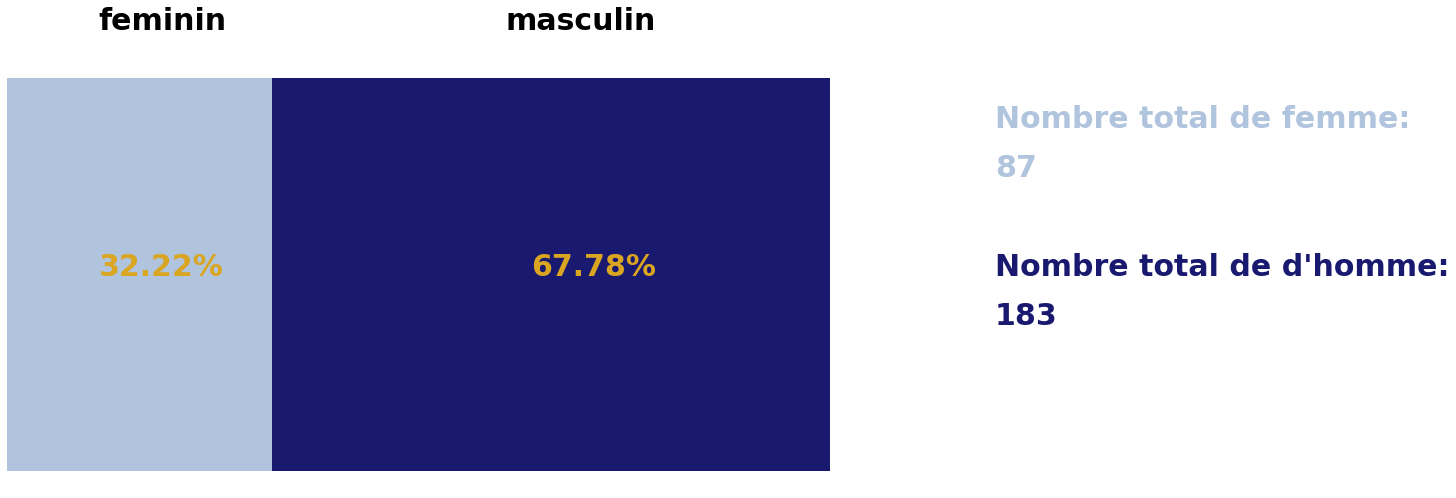

In [1316]:
# group by genre
group_genre = df.groupby('sexe')['coeur'].count().reset_index()
group_genre.rename(columns={'coeur':'Count'}, inplace=True)
group_genre['Percentage'] = round(group_genre['Count']/sum(group_genre['Count'])*100,2)
# group_genre

# fig
fig = plt.figure(figsize=(12,6))

# axes
axes1 = fig.add_axes([0,0,1,1])

# barh
axes1.barh(width=group_genre['Percentage'][0]+group_genre['Percentage'][1], y=0, color='MidnightBlue')
axes1.barh(width=group_genre['Percentage'][0], y=0, color='LightSteelBlue')

# percentages
axes1.text(group_genre['Percentage'][0]/2.9, 0, f"{group_genre['Percentage'][0]}%", color='Goldenrod', fontsize=30, fontweight='bold')
axes1.text((group_genre['Percentage'][0]+group_genre['Percentage'][1])/1.57, 0, f"{group_genre['Percentage'][1]}%", color='Goldenrod', fontsize=30, fontweight='bold')

# count
axes1.text(120, 0.3, "Nombre total de femme:", fontsize=30, fontweight='bold', color='LightSteelBlue')
axes1.text(120, 0.2, f"{group_genre['Count'][0]}", fontsize=30, fontweight='bold', color='LightSteelBlue')
axes1.text(120, 0, "Nombre total de d'homme:", fontsize=30, fontweight='bold', color='MidnightBlue')
axes1.text(120, -0.1, f"{group_genre['Count'][1]}", fontsize=30, fontweight='bold', color='MidnightBlue')

# title
axes1.text(group_genre['Percentage'][0]/2.9, 0.5, f"{group_genre['sexe'][0]}", color='Black', fontsize=30, fontweight='bold')
axes1.text((group_genre['Percentage'][0]+group_genre['Percentage'][1])/1.65, 0.5, f"{group_genre['sexe'][1]}", color='Black', fontsize=30, fontweight='bold')

# axis
axes1.axis('off')
fig.show()

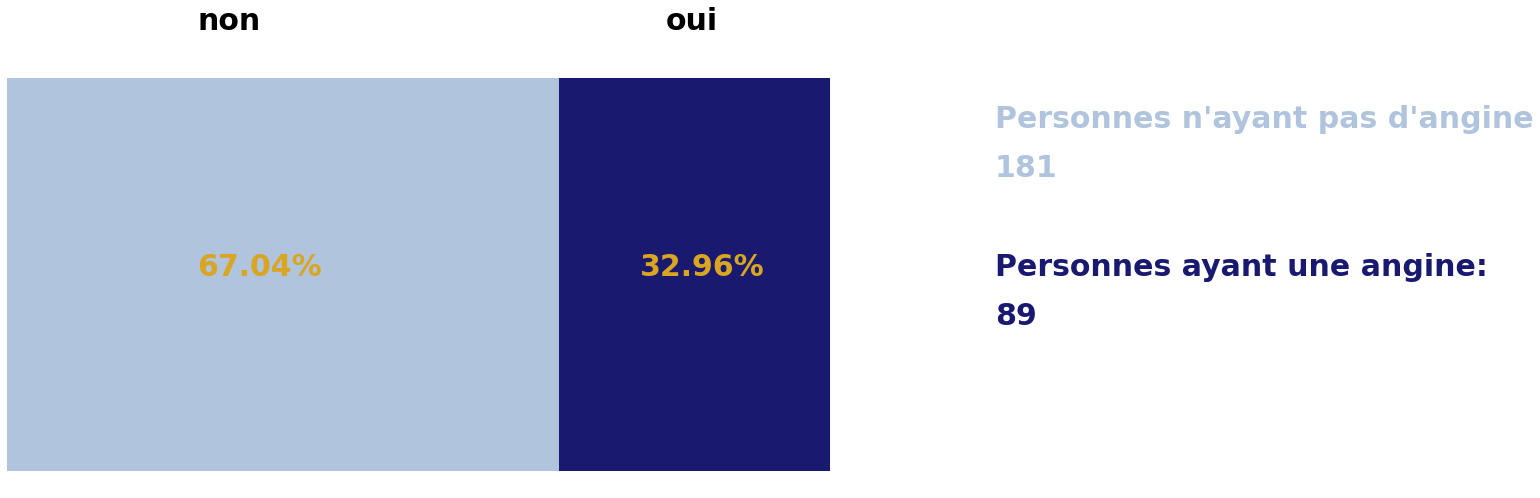

In [1337]:
# group by genre
group_genre = df.groupby('angine')['coeur'].count().reset_index()
group_genre.rename(columns={'coeur':'Count'}, inplace=True)
group_genre['Percentage'] = round(group_genre['Count']/sum(group_genre['Count'])*100,2)
# group_genre

# fig
fig = plt.figure(figsize=(12,6))

# axes
axes1 = fig.add_axes([0,0,1,1])

# barh
axes1.barh(width=group_genre['Percentage'][0]+group_genre['Percentage'][1], y=0, color='MidnightBlue')
axes1.barh(width=group_genre['Percentage'][0], y=0, color='LightSteelBlue')

# percentages
axes1.text(group_genre['Percentage'][0]/2.9, 0, f"{group_genre['Percentage'][0]}%", color='Goldenrod', fontsize=30, fontweight='bold')
axes1.text((group_genre['Percentage'][0]+group_genre['Percentage'][1])/1.3, 0, f"{group_genre['Percentage'][1]}%", color='Goldenrod', fontsize=30, fontweight='bold')

# count
axes1.text(120, 0.3, "Personnes n'ayant pas d'angine", fontsize=30, fontweight='bold', color='LightSteelBlue')
axes1.text(120, 0.2, f"{group_genre['Count'][0]}", fontsize=30, fontweight='bold', color='LightSteelBlue')
axes1.text(120, 0, "Personnes ayant une angine:", fontsize=30, fontweight='bold', color='MidnightBlue')
axes1.text(120, -0.1, f"{group_genre['Count'][1]}", fontsize=30, fontweight='bold', color='MidnightBlue')

# title
axes1.text(group_genre['Percentage'][0]/2.9, 0.5, f"{group_genre['angine'][0]}", color='Black', fontsize=30, fontweight='bold')
axes1.text((group_genre['Percentage'][0]+group_genre['Percentage'][1])/1.25, 0.5, f"{group_genre['angine'][1]}", color='Black', fontsize=30, fontweight='bold')

# axis
axes1.axis('off')
fig.show()

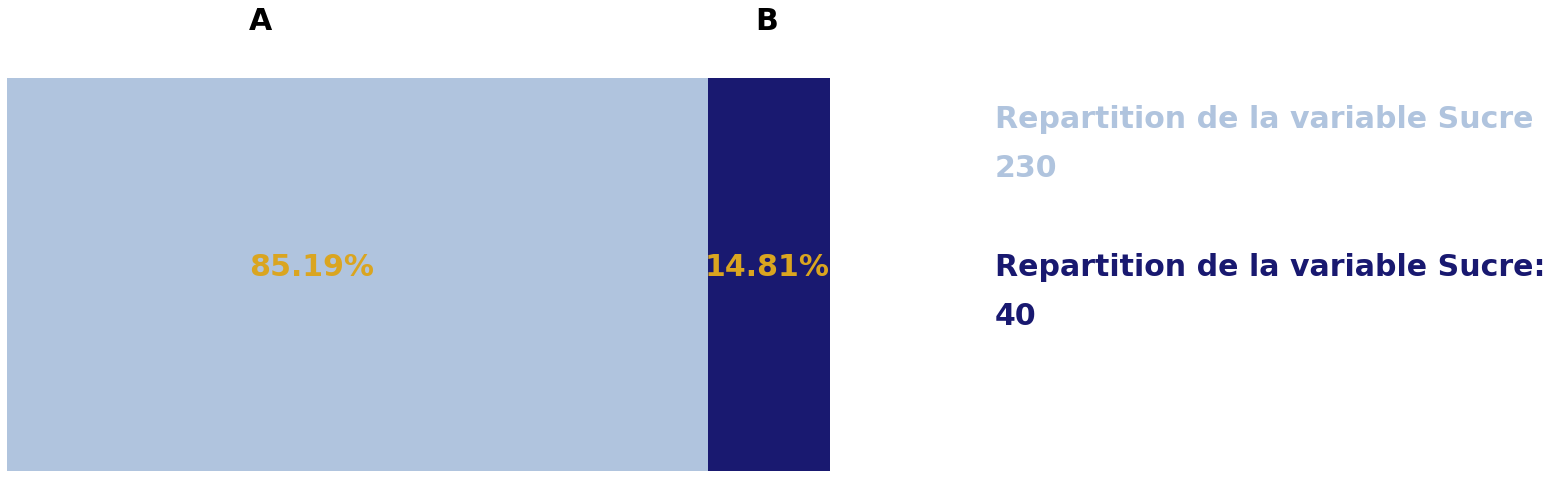

In [1351]:
# group by genre
group_genre = df.groupby('sucre')['coeur'].count().reset_index()
group_genre.rename(columns={'coeur':'Count'}, inplace=True)
group_genre['Percentage'] = round(group_genre['Count']/sum(group_genre['Count'])*100,2)
# group_genre

# fig
fig = plt.figure(figsize=(12,6))

# axes
axes1 = fig.add_axes([0,0,1,1])

# barh
axes1.barh(width=group_genre['Percentage'][0]+group_genre['Percentage'][1], y=0, color='MidnightBlue')
axes1.barh(width=group_genre['Percentage'][0], y=0, color='LightSteelBlue')

# percentages
axes1.text(group_genre['Percentage'][0]/2.9, 0, f"{group_genre['Percentage'][0]}%", color='Goldenrod', fontsize=30, fontweight='bold')
axes1.text((group_genre['Percentage'][0]+group_genre['Percentage'][1])/1.18, 0, f"{group_genre['Percentage'][1]}%", color='Goldenrod', fontsize=30, fontweight='bold')

# count
axes1.text(120, 0.3, "Repartition de la variable Sucre", fontsize=30, fontweight='bold', color='LightSteelBlue')
axes1.text(120, 0.2, f"{group_genre['Count'][0]}", fontsize=30, fontweight='bold', color='LightSteelBlue')
axes1.text(120, 0, "Repartition de la variable Sucre:", fontsize=30, fontweight='bold', color='MidnightBlue')
axes1.text(120, -0.1, f"{group_genre['Count'][1]}", fontsize=30, fontweight='bold', color='MidnightBlue')

# title
axes1.text(group_genre['Percentage'][0]/2.9, 0.5, f"{group_genre['sucre'][0]}", color='Black', fontsize=30, fontweight='bold')
axes1.text((group_genre['Percentage'][0]+group_genre['Percentage'][1])/1.1, 0.5, f"{group_genre['sucre'][1]}", color='Black', fontsize=30, fontweight='bold')

# axis
axes1.axis('off')
fig.show()

## 1.2.2 Représentation de deux variables quantitatives

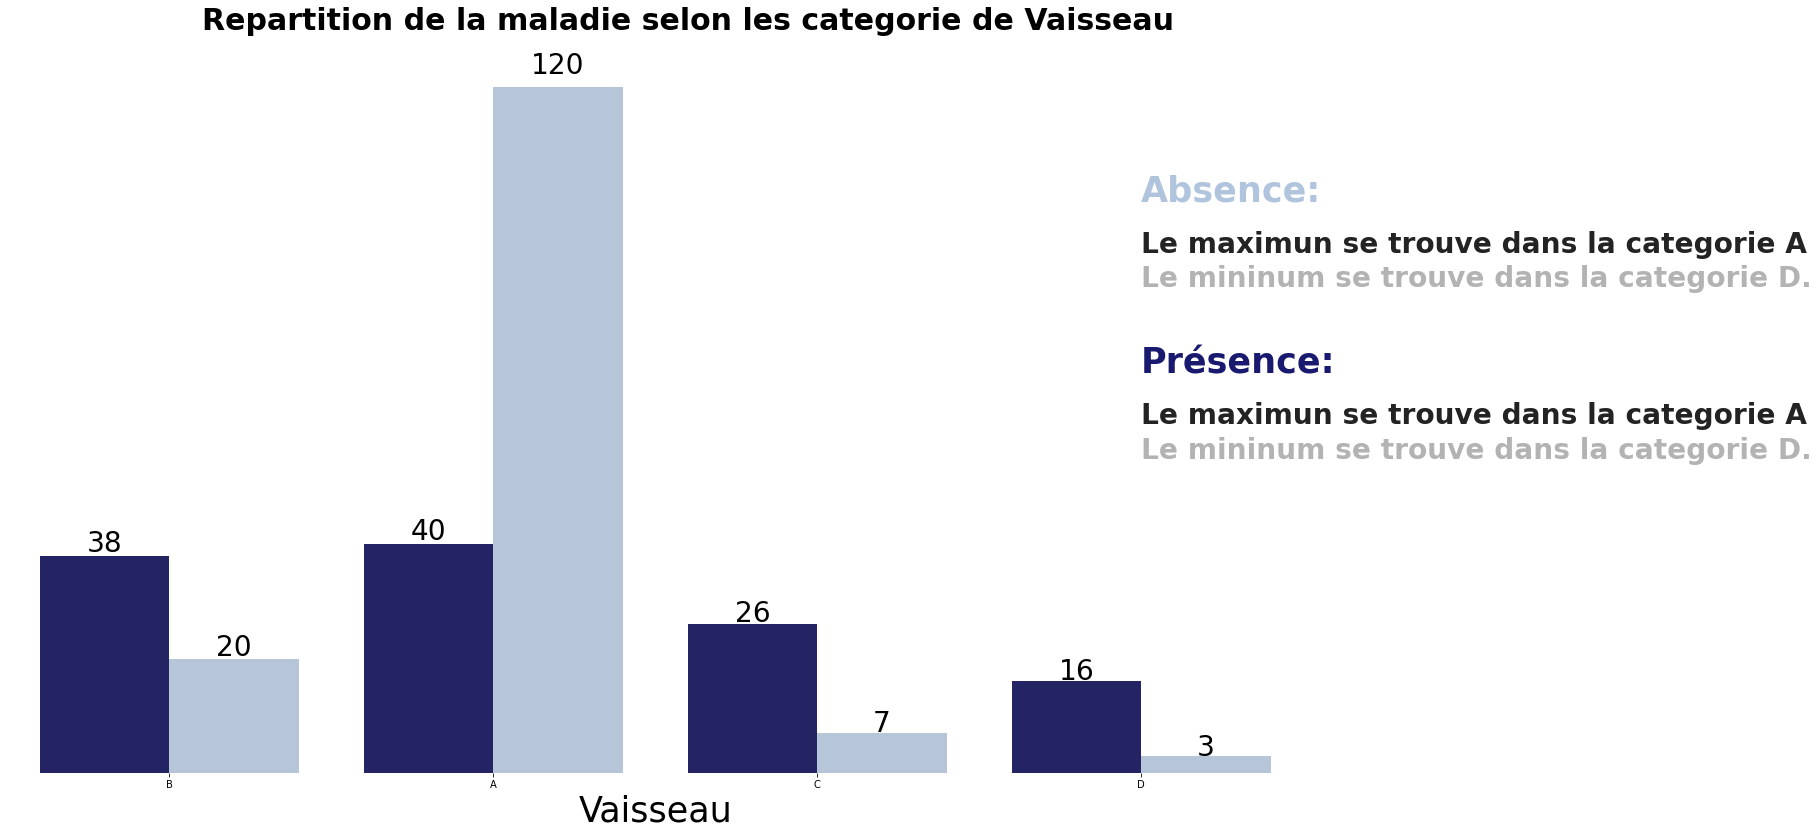

In [1398]:
# fig
fig = plt.figure(figsize=(18,10))

# axes
axes = fig.add_axes([0, 0, 1, 1])

# countplot
sns.countplot(x=df['vaisseau'], hue=df['coeur'], palette=['MidnightBlue','LightSteelBlue', ], ax=axes)

# spines
axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# ticks
axes.set_yticks([])

# legend
axes.get_legend().remove()

# bar's annotate
for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize=28)

# lables
axes.set_xlabel('Vaisseau', fontsize=35, color='black')
axes.set_ylabel('')

# title
axes.text(0.10, 130, 'Repartition de la maladie selon les categorie de Vaisseau', color='Black', fontsize=30, fontweight='bold', label='Maladie')

# conclusion
axes.text(3, 100, 'Absence:', fontsize=35, color='LightSteelBlue', fontweight='bold')
axes.text(3, 91, 'Le maximun se trouve dans la categorie A', fontsize=28, color='#232323', fontweight='bold')
axes.text(3, 85, 'Le mininum se trouve dans la categorie D.', fontsize=28, color='#b3b3b3', fontweight='bold')
axes.text(3, 70, 'Présence:', fontsize=35, color='MidnightBlue', fontweight='bold')
axes.text(3, 61, 'Le maximun se trouve dans la categorie A', fontsize=28, color='#232323', fontweight='bold')
axes.text(3, 55, 'Le mininum se trouve dans la categorie D.', fontsize=28, color='#b3b3b3', fontweight='bold')
fig.show()

In [1374]:
dic = var_stat_group('vaisseau', ['A', 'B', 'C', 'D'], 'coeur', ['absence', 'presence'])
dic

{'A_coeur_absence': 120,
 'A_coeur_presence': 40,
 'B_coeur_absence': 20,
 'B_coeur_presence': 38,
 'C_coeur_absence': 7,
 'C_coeur_presence': 26,
 'D_coeur_absence': 3,
 'D_coeur_presence': 16}

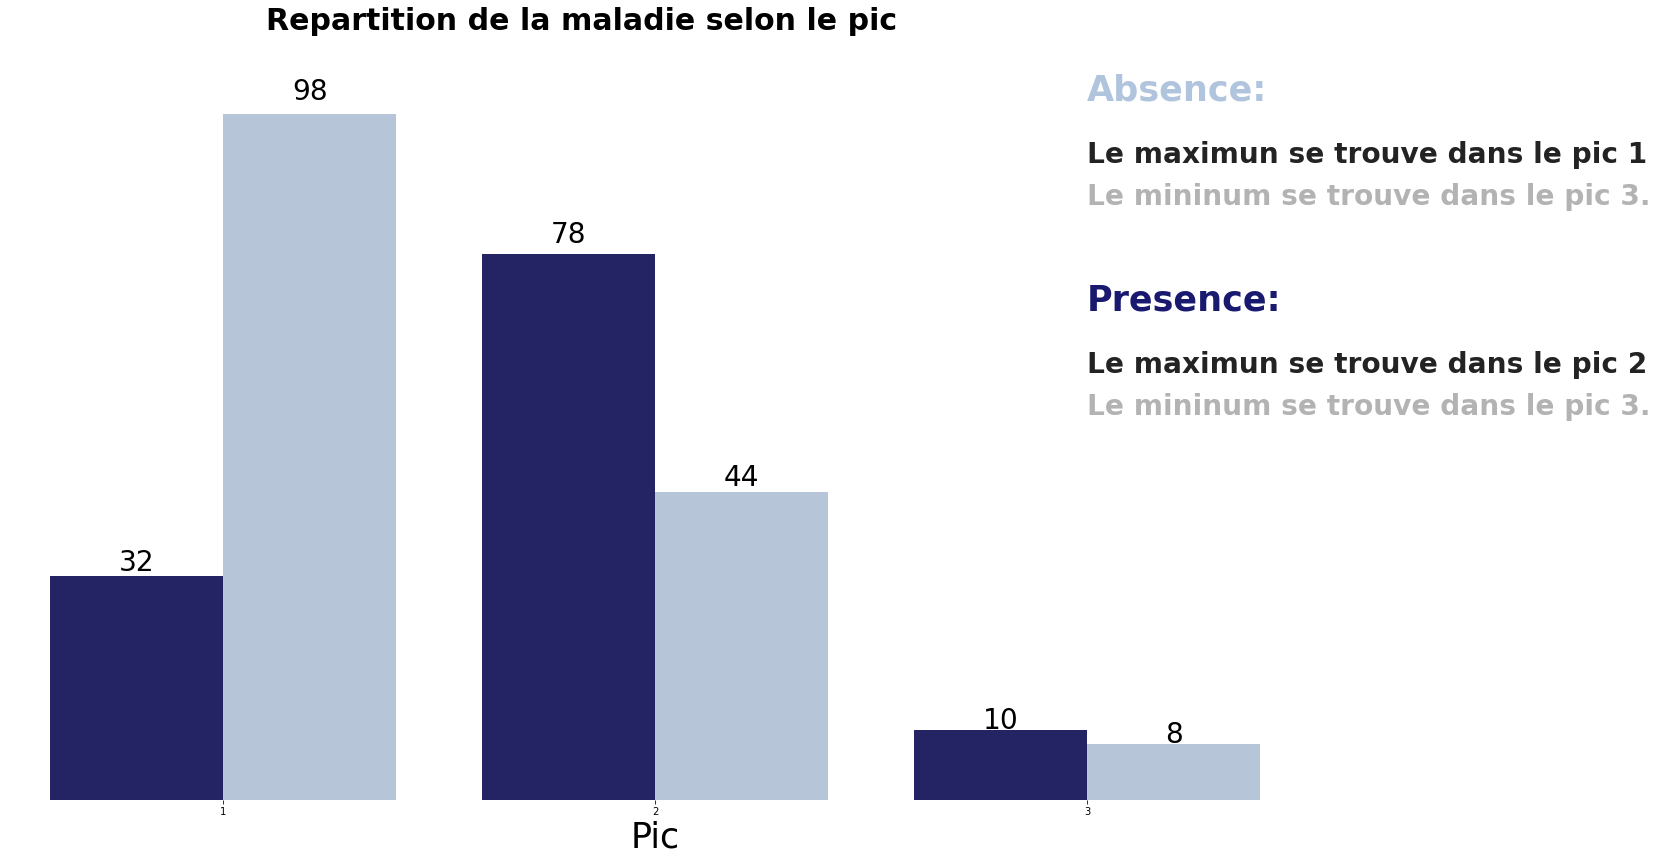

In [1401]:
# fig
fig = plt.figure(figsize=(18,10))

# axes
axes = fig.add_axes([0, 0, 1, 1])

# countplot
sns.countplot(x=df['pic'], hue=df['coeur'], palette=['MidnightBlue','LightSteelBlue', ], ax=axes)

# spines
axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# ticks
axes.set_yticks([])

# legend
axes.get_legend().remove()

# bar's annotate
for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize=28)

# lables
axes.set_xlabel('Pic', fontsize=35, color='black')
axes.set_ylabel('')

# title
axes.text(0.10, 110, 'Repartition de la maladie selon le pic', color='Black', fontsize=30, fontweight='bold', label='Maladie')

# conclusion
axes.text(2, 100, 'Absence:', fontsize=35, color='LightSteelBlue', fontweight='bold')
axes.text(2, 91, 'Le maximun se trouve dans le pic 1', fontsize=28, color='#232323', fontweight='bold')
axes.text(2, 85, 'Le mininum se trouve dans le pic 3.', fontsize=28, color='#b3b3b3', fontweight='bold')
axes.text(2, 70, 'Presence:', fontsize=35, color='MidnightBlue', fontweight='bold')
axes.text(2, 61, 'Le maximun se trouve dans le pic 2', fontsize=28, color='#232323', fontweight='bold')
axes.text(2, 55, 'Le mininum se trouve dans le pic 3.', fontsize=28, color='#b3b3b3', fontweight='bold')
fig.show()

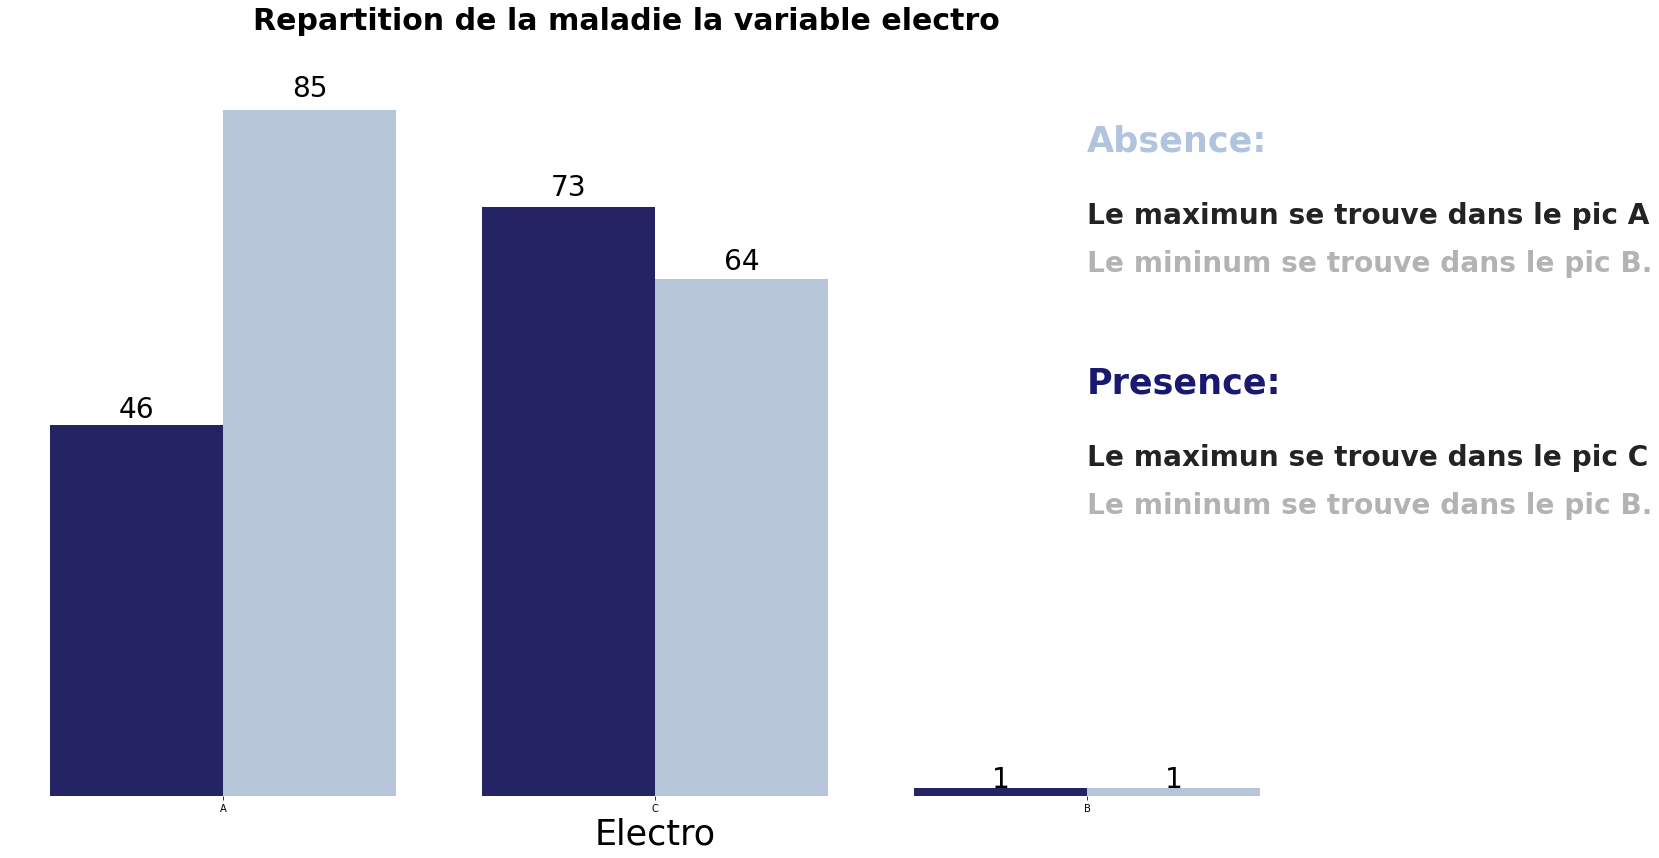

In [1417]:
# fig
fig = plt.figure(figsize=(18,10))

# axes
axes = fig.add_axes([0, 0, 1, 1])

# countplot
sns.countplot(x=df['electro'], hue=df['coeur'], palette=['MidnightBlue','LightSteelBlue', ], ax=axes)

# spines
axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# ticks
axes.set_yticks([])

# legend
axes.get_legend().remove()

# bar's annotate
for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize=28)

# lables
axes.set_xlabel('Electro', fontsize=35, color='black')
axes.set_ylabel('')

# title
axes.text(0.07, 95, 'Repartition de la maladie la variable electro', color='Black', fontsize=30, fontweight='bold', label='Maladie')

# conclusion
axes.text(2, 80, 'Absence:', fontsize=35, color='LightSteelBlue', fontweight='bold')
axes.text(2, 71, 'Le maximun se trouve dans le pic A', fontsize=28, color='#232323', fontweight='bold')
axes.text(2, 65, 'Le mininum se trouve dans le pic B.', fontsize=28, color='#b3b3b3', fontweight='bold')
axes.text(2, 50, 'Presence:', fontsize=35, color='MidnightBlue', fontweight='bold')
axes.text(2, 41, 'Le maximun se trouve dans le pic C', fontsize=28, color='#232323', fontweight='bold')
axes.text(2, 35, 'Le mininum se trouve dans le pic B.', fontsize=28, color='#b3b3b3', fontweight='bold')
fig.show()

## 1.2.3 Représentation de deux variables (quantitative - qualitative)

<ipython-input-1130-c231f6384f2b>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


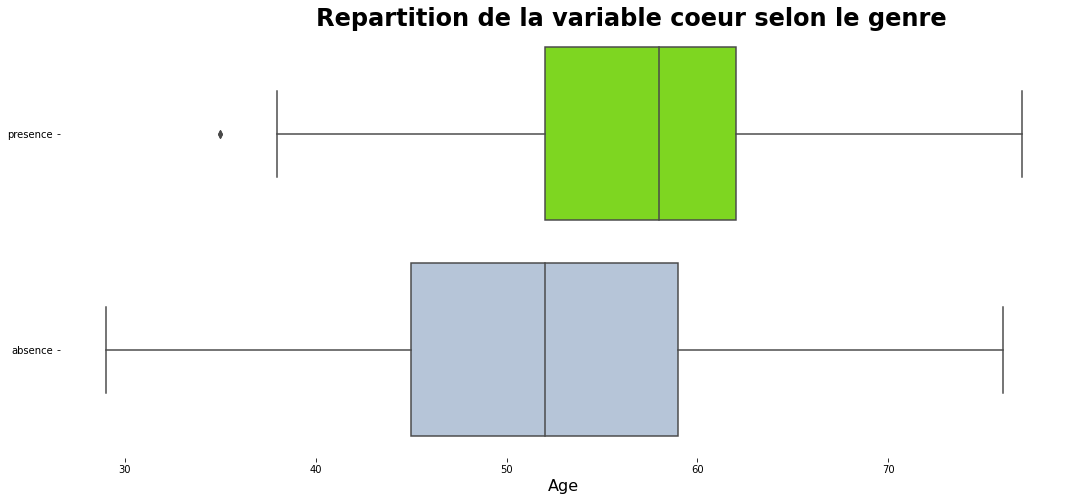

In [1130]:
# fig
fig = plt.figure(figsize=(14,6))

# axes
axes = fig.add_axes([0,0,1,1])

# boxplot
sns.boxplot(x=df['age'], y=df['coeur'], palette=sample(couleurs, k=2), ax=axes)

# spines
axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# lables
axes.set_xlabel('Age', fontsize=16, color='black')
axes.set_ylabel('')

# title
axes.text(40, -0.5, "Repartition de la variable coeur selon le genre", color='Black', fontsize=24, fontweight='bold')

fig.show()

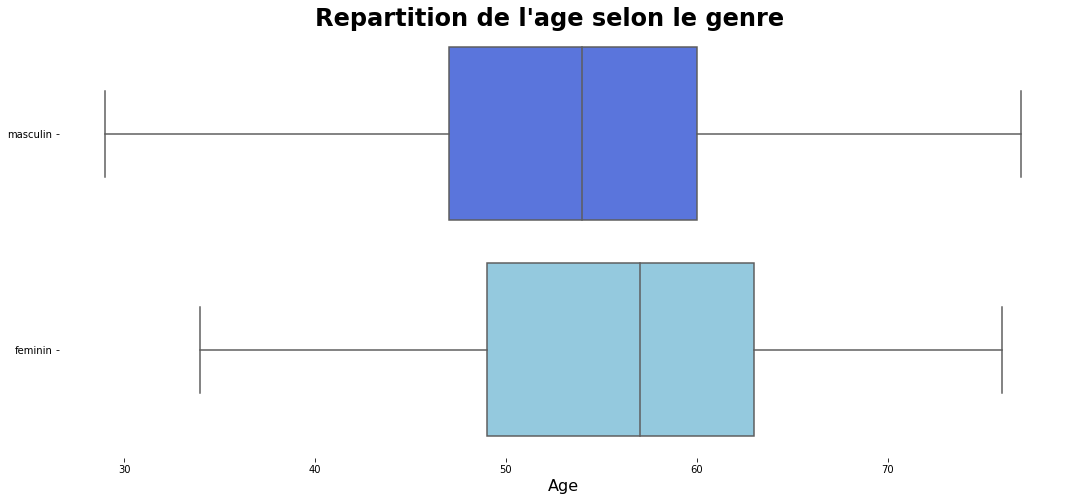

In [1452]:
# fig
couleurs = ['SkyBlue', '#4568f1', '#f4f403', '#EEEEEE', '#7ff403', '#f403dc', 
            '#ffa200', 'MidnightBlue','LightSteelBlue']

fig = plt.figure(figsize=(14,6))

# axes
axes = fig.add_axes([0,0,1,1])

# boxplot
sns.boxplot(x=df['age'], y=df['sexe'], palette=sample(couleurs, k=2), ax=axes)
# sns.boxplot(x=df['age'], y=df['vaisseau'], palette=sample(couleurs, k=1), ax=axes)

# spines
axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# lables
axes.set_xlabel('Age', fontsize=16, color='black')
axes.set_ylabel('')

# title
axes.text(40, -0.5, "Repartition de l'age selon le genre", color='Black', fontsize=24, fontweight='bold')

fig.show()

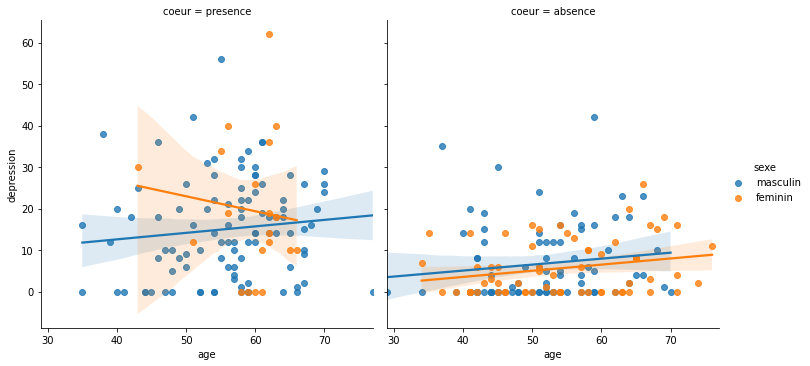

In [1472]:
sns.lmplot("age", "depression", hue="sexe", col="coeur", data=df)

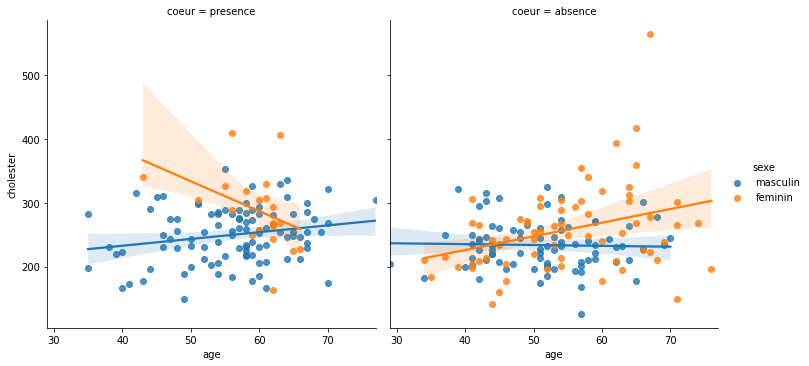

In [1471]:
sns.lmplot("age", "cholester", hue="sexe", col="coeur", data=df)

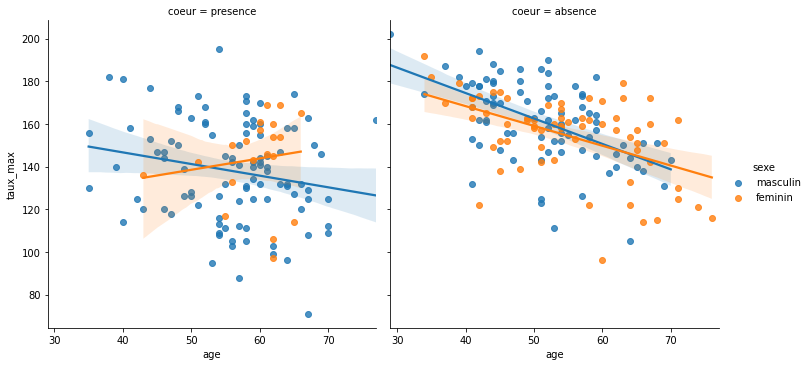

In [1470]:
sns.lmplot("age", "taux_max", hue="sexe", col="coeur", data=df)

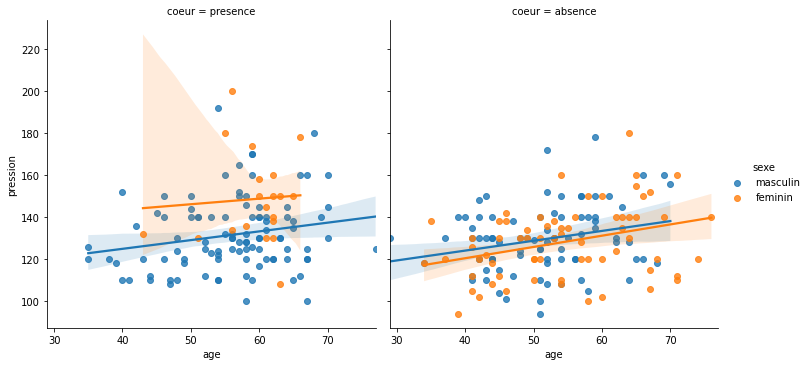

In [1468]:
sns.lmplot("age", "pression", hue="sexe", col="coeur", data=df)

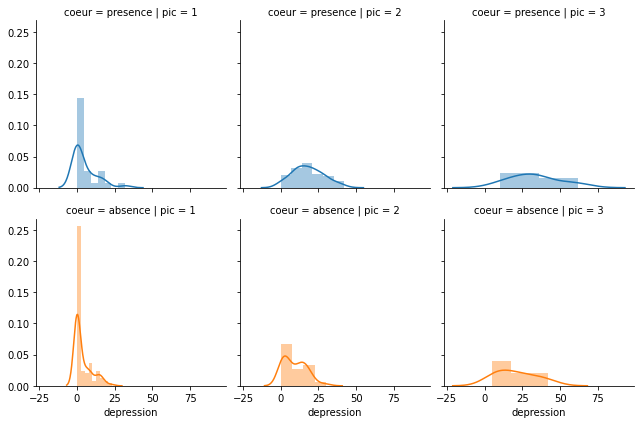

In [1476]:
p = sns.FacetGrid(df, row="coeur", col="pic", hue='coeur')
p.map(sns.distplot, "depression")

## 1.2.4 Représentation individuel des variables quantitative

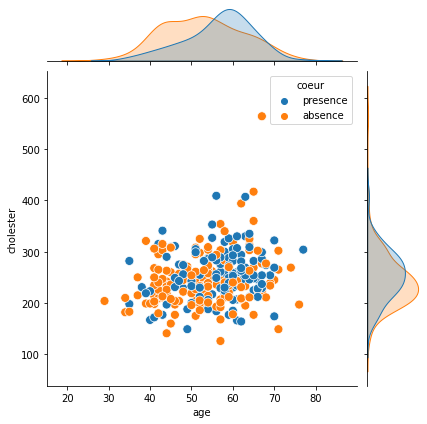

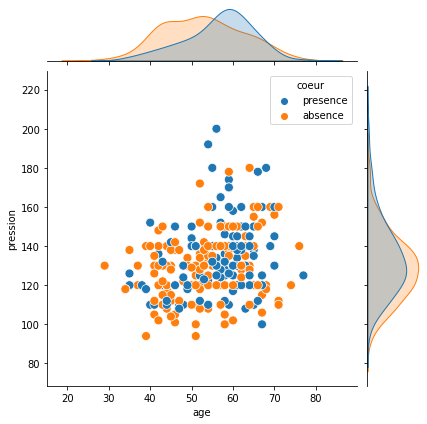

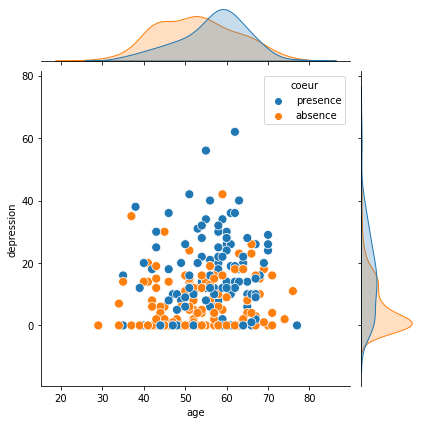

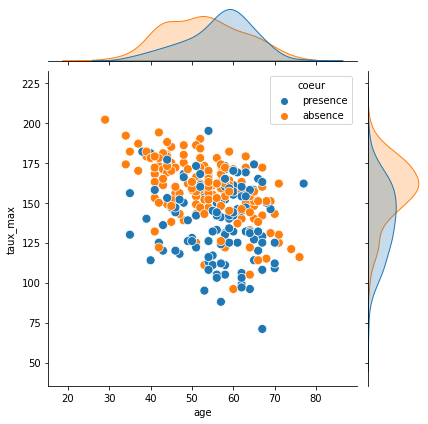

In [1447]:
# représentation du jointplot
ax = sns.jointplot(x='age', 
                   y='cholester', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='age', 
                   y='pression', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='age', 
                   y='depression', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='age', 
                   y='taux_max', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

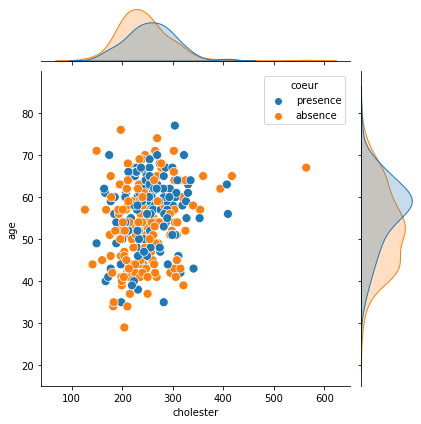

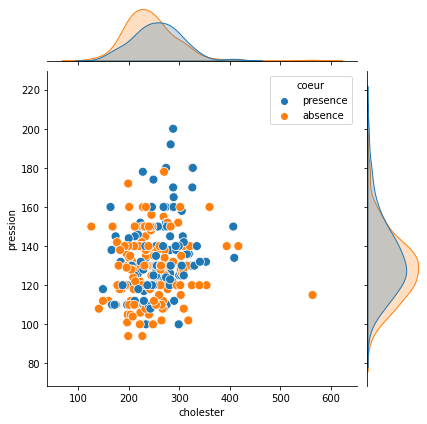

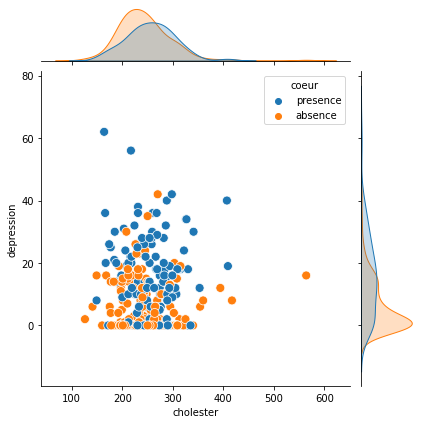

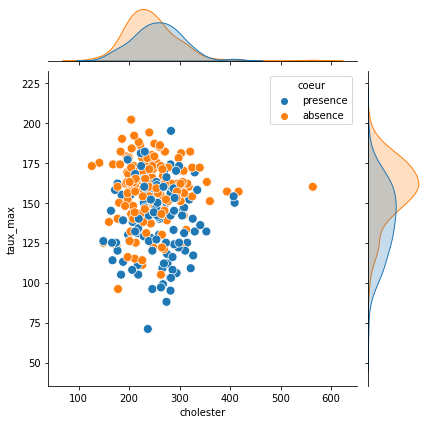

In [1441]:
# représentation du jointplot
ax = sns.jointplot(x='cholester', 
                   y='age', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='cholester', 
                   y='pression', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='cholester', 
                   y='depression', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='cholester', 
                   y='taux_max', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

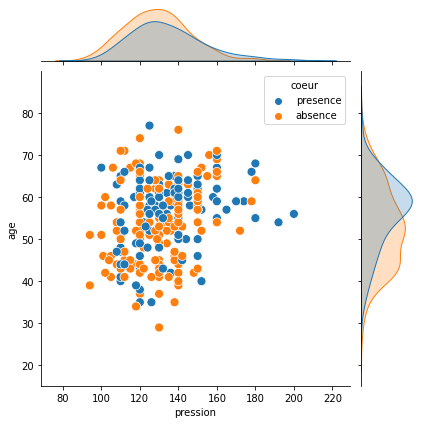

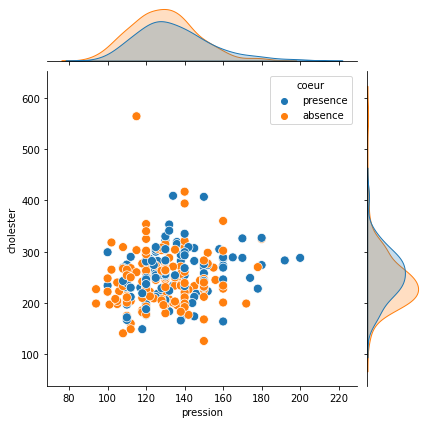

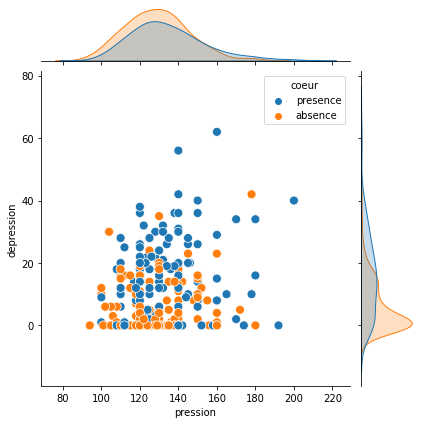

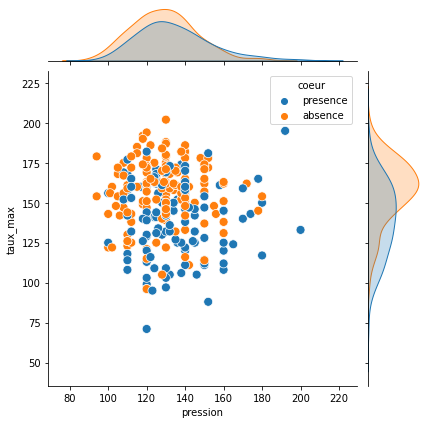

In [1442]:
# représentation du jointplot
ax = sns.jointplot(x='pression', 
                   y='age', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='pression', 
                   y='cholester', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='pression', 
                   y='depression', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='pression', 
                   y='taux_max', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

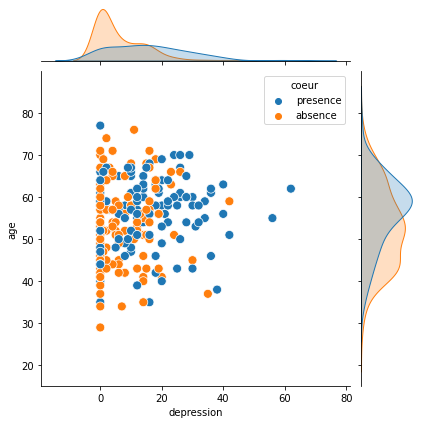

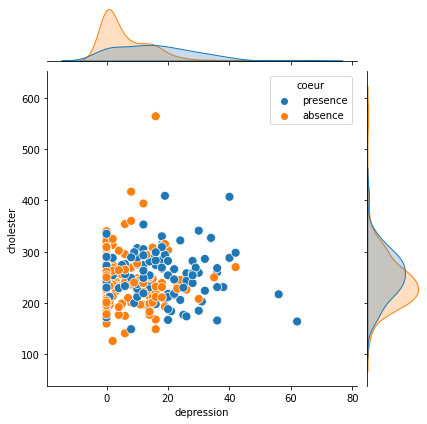

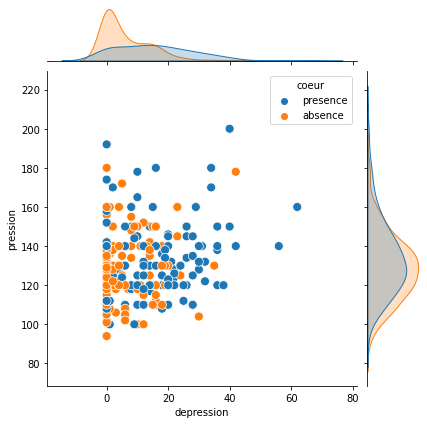

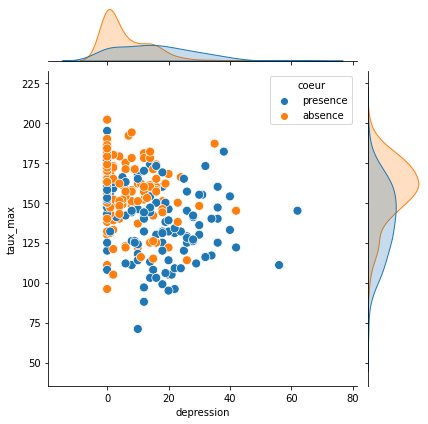

In [1443]:
# représentation du jointplot
ax = sns.jointplot(x='depression', 
                   y='age', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='depression', 
                   y='cholester', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='depression', 
                   y='pression', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

ax = sns.jointplot(x='depression', 
                   y='taux_max', 
                   data=df,
                   hue='coeur',
                   joint_kws={"s": 80})

## 2 Prediction
### 2.1 Modèle de regression logistique

In [1047]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [1050]:
X = df[['age','pression','cholester','taux_max']].values
#Y = df['taux_max']
y = df['coeur']
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [1052]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [1061]:
log.score(X_test,Y_test)

0.6481481481481481

### 2.2 Modèle utilisant le Bagging

In [1057]:
from sklearn.ensemble import BaggingClassifier

In [1063]:
model = BaggingClassifier(base_estimator=LogisticRegression(),
                         n_estimators=100)

model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.6666666666666666

In [1139]:
df

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100,234,A,A,156,non,1,1,B,presence
1,41,feminin,130,204,A,C,172,non,14,1,A,absence
2,58,masculin,150,270,A,C,111,oui,8,1,A,presence
3,53,masculin,140,203,B,C,155,oui,31,3,A,presence
4,41,masculin,130,214,A,C,168,non,20,2,A,absence
...,...,...,...,...,...,...,...,...,...,...,...,...
265,62,feminin,140,268,A,C,160,non,36,3,C,presence
266,62,masculin,130,231,A,A,146,non,18,2,D,absence
267,64,masculin,110,211,A,C,144,oui,18,2,A,absence
268,63,feminin,150,407,A,C,154,non,40,2,D,presence
